In [24]:
#Celebal Technologies Assignment - Week-5
#Import all the required libraries
# Project: House Price Prediction - Data Preprocessing & Feature Engineering

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#load the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
# Check and display missing values
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [29]:
# Fill missing categorical values with 'None'
cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in cols_fill_none:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [30]:
# Fill missing numerical values with median
cols_fill_median = ['LotFrontage', 'GarageYrBlt']
for col in cols_fill_median:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(test[col].median())


In [31]:
# Drop remaining rows with missing values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [32]:
# Feature Engineering: Create new meaningful features

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['TotalBath'] = (train['FullBath'] + 0.5*train['HalfBath'] +
                      train['BsmtFullBath'] + 0.5*train['BsmtHalfBath'])
train['AgeAtSale'] = train['YrSold'] - train['YearBuilt']

In [33]:
# Encode categorical variables using Label Encoding

from sklearn.preprocessing import LabelEncoder

cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    lbl = LabelEncoder()
    train[col] = lbl.fit_transform(train[col].astype(str))

In [34]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath,AgeAtSale
0,1,60,2,65.0,8450,1,1,3,3,0,...,0,0,2,2008,6,4,208500,2566,3.5,5
2,3,60,2,68.0,11250,1,1,0,3,0,...,0,0,9,2008,6,4,223500,2706,3.5,7
4,5,60,2,84.0,14260,1,1,0,3,0,...,0,0,12,2008,6,4,250000,3343,3.5,8
6,7,20,2,75.0,10084,1,1,3,3,0,...,0,0,8,2007,6,4,307000,3380,3.0,3
7,8,60,2,69.0,10382,1,1,0,3,0,...,1,350,11,2009,6,4,200000,3197,3.5,36


In [35]:
all_data = pd.concat([train, test], sort=False).reset_index(drop=True)
# Combined train and test data for consistent transformations

<Axes: xlabel='SalePrice', ylabel='Count'>

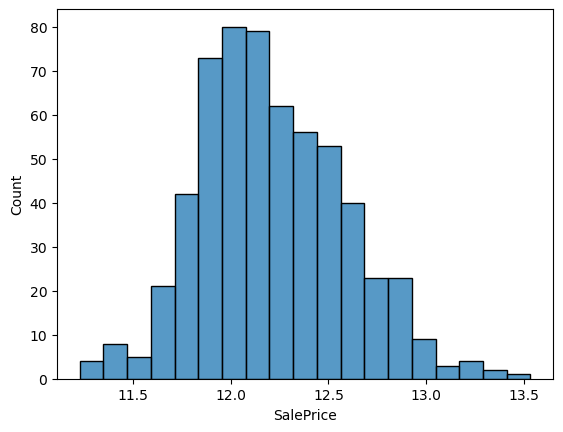

In [36]:
sns.histplot(np.log1p(train['SalePrice']))


In [37]:
# Add outlier flag based on Neighborhood and SaleCondition

all_data['Outlier'] = ((all_data['Neighborhood']=='Edwards') & (all_data['SaleCondition']=='Partial')).astype(int)
